In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [50]:
df=pd.read_csv("../../data/processed/cap-3.csv")
df=df.drop("Unnamed: 0",axis=1)
df.head()

,Merit No,Marks,Application ID,Name of Candidate,Gender,Category,Category id,Seat Type,PWD/DEF,Sub Group,sub group name,cource_code,cource code name,college_code,Institute dict,Institute Name,Seat conformation,Seat conformation id
0,60,95.13,19106856,PAWAR SIDDHI RAVINDRASINGH,F,OPEN,1,LOPEN,NaN,201,Civil,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0
1,213,93.38,19126045,MAHALLE SHRADDHA MOHANRAO,F,OBC,2,GOPEN,NaN,201,Civil,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0
2,384,92.47,19105661,TUSHAR RAJESH LAHANE,M,OBC,2,GOBC,NaN,201,Civil,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0
3,420,92.31,19103256,RAUT PALASH SUBHASH,M,OBC,2,GOBC,NaN,201,Civil,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0
4,846,90.79,19148502,BIRAJDAR SAURABH DAYANAND,M,SEBC,3,GSEBC,NaN,201,Civil,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0


In [51]:
gender=dict({
    "F":1,
    "M":0
})
df["GenderCode"]=df["Gender"].map(gender)

In [52]:
dummy_frame=pd.get_dummies(df["Gender"],drop_first=True)
df=pd.concat([df,dummy_frame],axis=1)

In [53]:
df.corr()

,Merit No,Marks,Application ID,Category id,Sub Group,cource_code,college_code,Seat conformation id,GenderCode,F,M
Merit No,1.000000,0.540966,0.703967,0.412531,0.650388,0.650224,0.586906,0.093338,-0.218259,0.115920,0.582314
Marks,0.540966,1.000000,0.977275,0.553842,0.890029,0.895341,0.843347,-0.107446,0.214513,0.403300,0.613388
Application ID,0.703967,0.977275,1.000000,0.570479,0.912145,0.917514,0.857992,0.006627,0.002360,0.369488,0.662395
Category id,0.412531,0.553842,0.570479,1.000000,0.500171,0.502768,0.499533,-0.040615,0.048155,0.247544,0.348273
Sub Group,0.650388,0.890029,0.912145,0.500171,1.000000,0.991266,0.800270,-0.029632,-0.157778,0.276927,0.652647
cource_code,0.650224,0.895341,0.917514,0.502768,0.991266,1.000000,0.800999,-0.024176,-0.159053,0.280223,0.655146
college_code,0.586906,0.843347,0.857992,0.499533,0.800270,0.800999,1.000000,0.035980,0.008968,0.321281,0.564855
Seat conformation id,0.093338,-0.107446,0.006627,-0.040615,-0.029632,-0.024176,0.035980,1.000000,-0.032432,-0.032432,0.032432
GenderCode,-0.218259,0.214513,0.002360,0.048155,-0.157778,-0.159053,0.008968,-0.032432,1.000000,1.000000,-1.000000
F,0.115920,0.403300,0.369488,0.247544,0.276927,0.280223,0.321281,-0.032432,1.000000,1.000000,-0.451393


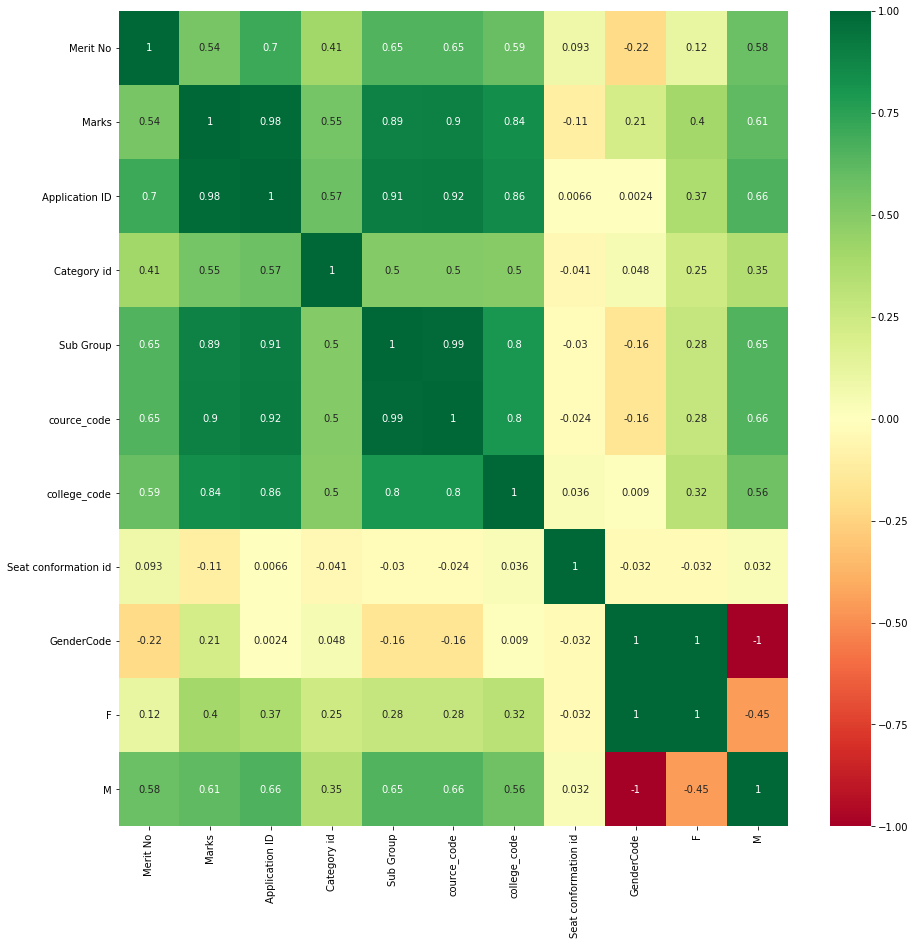

In [54]:
cormat=df.corr()
top_cor_feature=cormat.index
plt.figure(figsize=(15,15))
sns.heatmap(df[top_cor_feature].corr(),annot=True,cmap="RdYlGn")

In [63]:
x=df[["Marks","F","Category id","cource_code"]]
y=df["Institute Name"]

In [64]:
forest=RandomForestRegressor()

In [65]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=5000,num=30)]
max_features = ['auto']
max_depth=[int (x) for x in np.linspace(5,100,num=20)]
min_samples_split = [int (x) for x in np.linspace(start=1,stop=200,num=50)]
min_samples_leaf = [1, 2, 5]

paramaters=dict({
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf,
})

In [66]:
model=RandomizedSearchCV(forest,paramaters,verbose=2,cv=5,random_state=40)

In [67]:
model.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1789, min_samples_split=147, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=1789, min_samples_split=147, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=1789, min_samples_split=147, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=1789, min_samples_split=147, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=1789, min_samples_split=147, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=1789, min_samples_split=147, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=1789, min_samples_split=147, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=1789, min_samples_split=147, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=1789, min_samples_split=147, min_samples_leaf=2, max_features

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\shubham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\shubham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
C:\Users\shubham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
C:\Users\shubham\anaconda3

[CV]  n_estimators=1451, min_samples_split=78, min_samples_leaf=1, max_features=auto, max_depth=65, total=   0.0s
[CV] n_estimators=1451, min_samples_split=78, min_samples_leaf=1, max_features=auto, max_depth=65 
[CV]  n_estimators=1451, min_samples_split=78, min_samples_leaf=1, max_features=auto, max_depth=65, total=   0.0s
[CV] n_estimators=1451, min_samples_split=78, min_samples_leaf=1, max_features=auto, max_depth=65 
[CV]  n_estimators=1451, min_samples_split=78, min_samples_leaf=1, max_features=auto, max_depth=65, total=   0.0s
[CV] n_estimators=1451, min_samples_split=78, min_samples_leaf=1, max_features=auto, max_depth=65 
[CV]  n_estimators=1451, min_samples_split=78, min_samples_leaf=1, max_features=auto, max_depth=65, total=   0.0s
[CV] n_estimators=2127, min_samples_split=139, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=2127, min_samples_split=139, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=2127, min_samp

C:\Users\shubham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
C:\Users\shubham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
C:\Users\shubham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
C:\Users\shubham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

ValueError: Input contains NaN

In [35]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=147, min_weight_fraction_leaf=0.0,
                      n_estimators=1789, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [69]:
model.predict([80,1,1,1002])

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [57]:
df.head()

,Merit No,Marks,Application ID,Name of Candidate,Gender,Category,Category id,Seat Type,PWD/DEF,Sub Group,...,cource_code,cource code name,college_code,Institute dict,Institute Name,Seat conformation,Seat conformation id,GenderCode,F,M
0,60,95.13,19106856,PAWAR SIDDHI RAVINDRASINGH,F,OPEN,1,LOPEN,NaN,201,...,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0,1.0,1,0
1,213,93.38,19126045,MAHALLE SHRADDHA MOHANRAO,F,OBC,2,GOPEN,NaN,201,...,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0,1.0,1,0
2,384,92.47,19105661,TUSHAR RAJESH LAHANE,M,OBC,2,GOBC,NaN,201,...,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0,0.0,0,1
3,420,92.31,19103256,RAUT PALASH SUBHASH,M,OBC,2,GOBC,NaN,201,...,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0,0.0,0,1
4,846,90.79,19148502,BIRAJDAR SAURABH DAYANAND,M,SEBC,3,GSEBC,NaN,201,...,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0,0.0,0,1
